# Проверка гипотез по увеличению выручки в интернет-магазине

В нашем распоряжении список гипотез для увеличения выручки крупного интернет-магазина. Мы приоритизируем гипотезы и запустим A/B-тест, проанализируем результаты.

In [1]:
#импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Приоритизация гипотез

Загрузим данные, где представлены 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [2]:
#загружаем датасет
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
#выведем данные
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#посмотрим какие гипотезы были представлены
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

### ICE

Применим фреймворк ICE для приоритизации гипотез

In [4]:
hypothesis['ICE'] = round(((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']), 2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


По методу ICE SCORE самой приоритетной гипотезой является запуск акции, которая даёт скидку на товар в день рождения

### RICE

Применим фреймворк RICE для приоритизации гипотез

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


По методу RICE SCORE самой приоритетной гипотезой является добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

При использовании метода RICE SCORE добавляется параметр Reach, который отражает охват пользователей, которых затронут изменения. По стоимости обе гипотезы имеют одинаковую оценку, при этом охват добавления формы будет значительно выше, чем запуск акции, и не смотря на то, что влияние изменения и уверенность в этом изменении ниже, они всё равно имеют досточно высокие показатели.

## Анализ A/B-теста

Загрузим данные по проведённому A/B-тесту и изучим их.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [9]:
#соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [10]:
#получим агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [12]:
# разделим заказы по группам
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"') 
  
# проверяем, есть ли пользователи, которые попали в обе группы 
group_intersections = list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

58

58 пользователей есть в обеих группах, уберём их из записей

In [13]:
# удаляем пользователей, которые попали в обе группы
orders = orders.query('visitorId not in @group_intersections')

### Построим график кумулятивной выручки по группам

In [14]:
#размер графиков
#размер графиков
sns.set(rc={'figure.figsize':(20,10)})

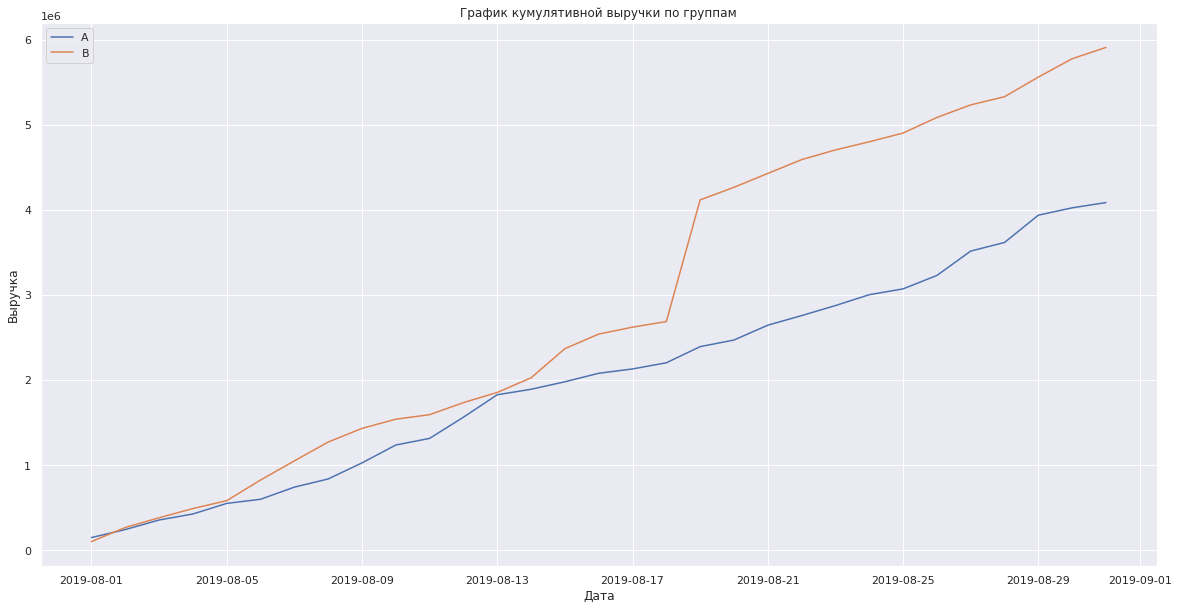

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend() 

Выручка в обеих группахвыручка увеличивается на протяжении всего теста. В обеих группах есть скачки в нескольких точках, однако у группы В в одной из точек присутствует очень резки рост, который может свидетельствовать об увеличении количества заказов или о крупном заказе.

### Построим график кумулятивного среднего чека по группам

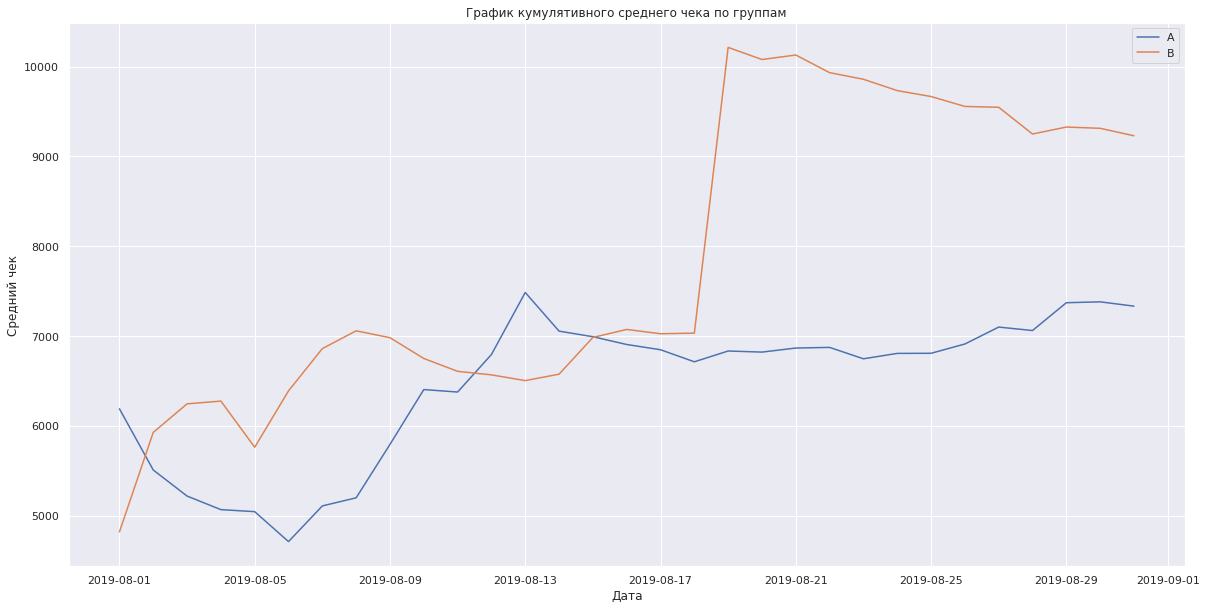

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 

Средний чек группы А увличивается, а группы В падает, обе группы не пришли к реальному среднему чеку, возможно не достаточно времени. Также средний чек группы В по графику значительно выше, чем средний чек группы А. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

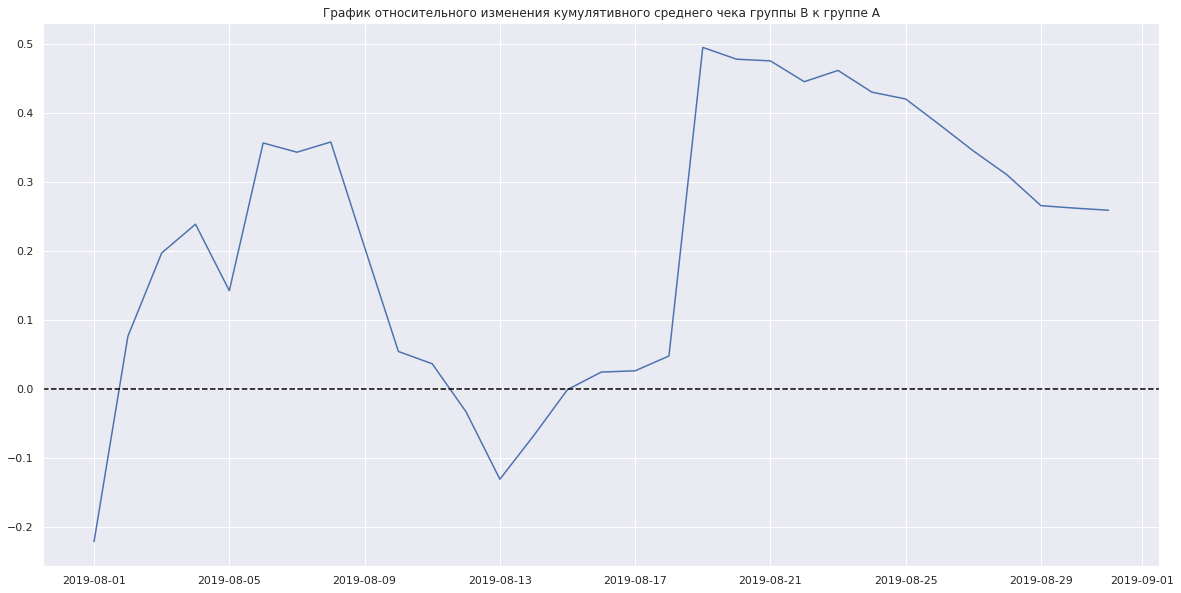

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

График различия имеет резкие скачки, что говорит нам о выбросах. Но почти за весь период проведения теста средний чек группы В выше, чем средний чек группы А.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

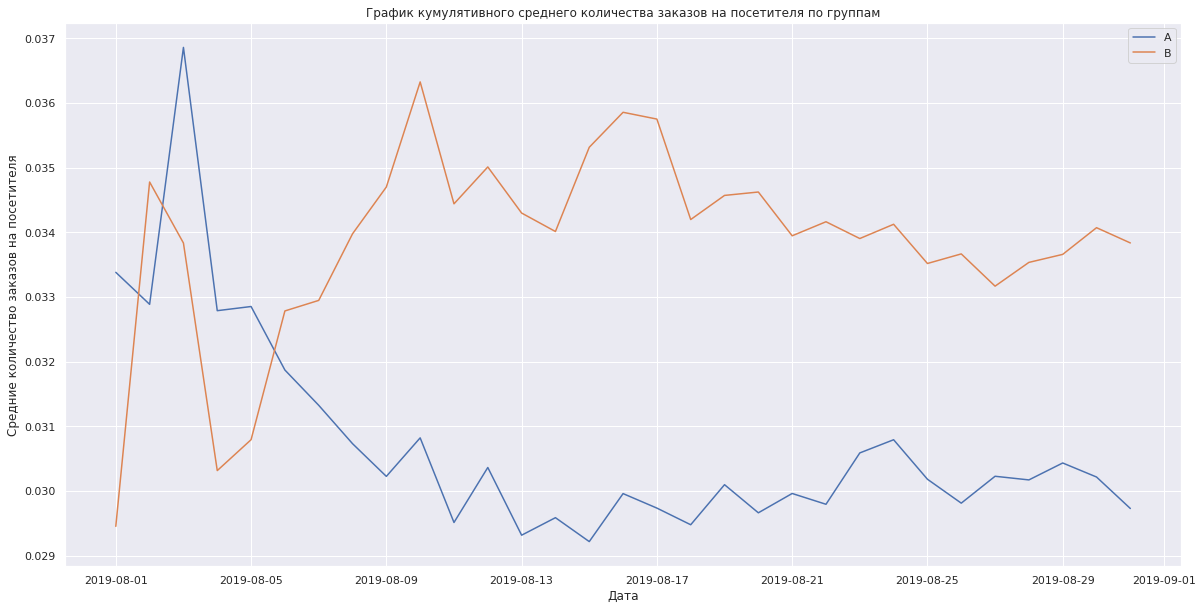

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Средние количество заказов на посетителя')
plt.legend()


Группа В показывает большее комулятивное среднее количества заказов на поситителя, чем группа А. Но графики не равномерны и не зафиксировались к концу теста, так же присутствуют резкие скачки в обеих группах, возможно дело в аномалиях.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

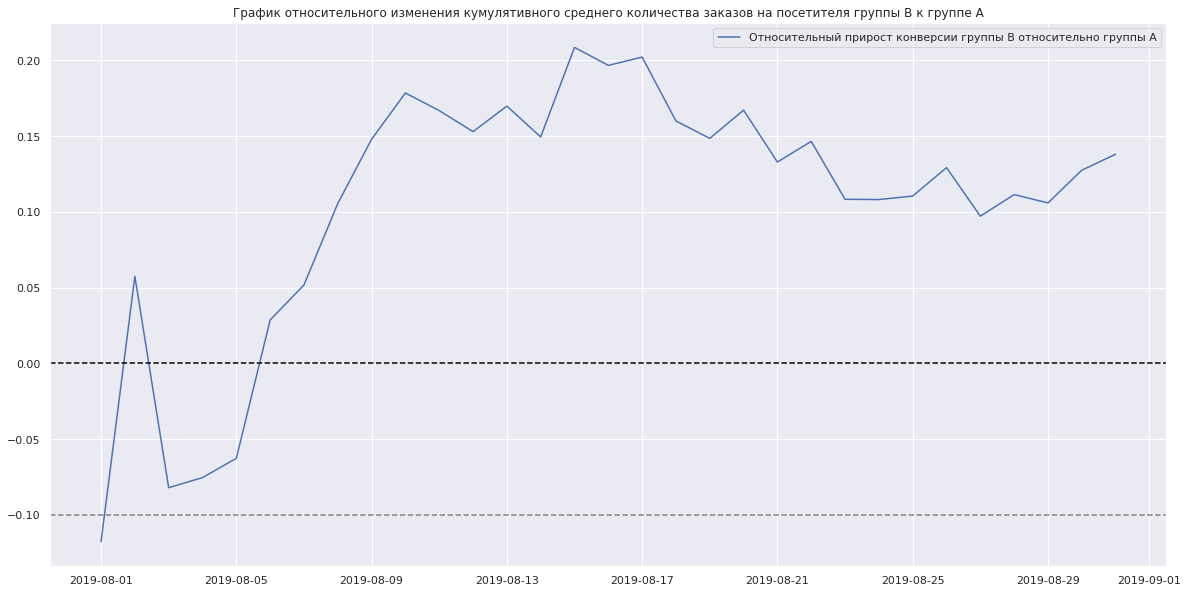

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

Уже с первых дней с начала теста группа B значительно выше группы A. Но отношение конверсии ещё не установилось, нельзя делать выводы исходя из этих данных, в первую очередб необходимо проанализировать аномалии.

### Построим точечный график количества заказов по пользователям

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

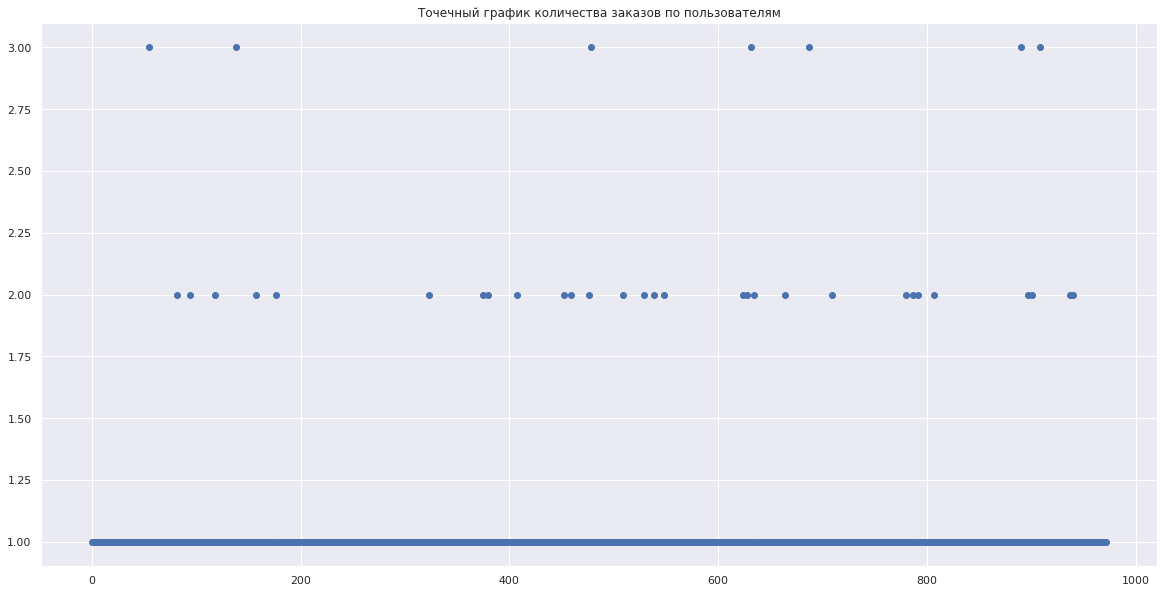

In [20]:
orders_agg = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_agg.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(orders_agg)))
plt.scatter(x_values, orders_agg['orders'])
plt.title('Точечный график количества заказов по пользователям')

По точечному графику видно, что в основном пользователи оформляли заказы 1 раз, также есть небольшое количество пользователей с 2 и 3 заказами, проверим какой процент этих пользователей.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [21]:
np.percentile(orders_agg['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли более 1 заказа, не более 1% пользователей оформляли более 2 заказов. Примем за аномальных пользователей тех, кто оформил заказ более одного раза, так мы отсечём 5% пользователей.

### Построим точечный график стоимостей заказов

Text(0.5, 1.0, 'Точечный график стоимстей заказов')

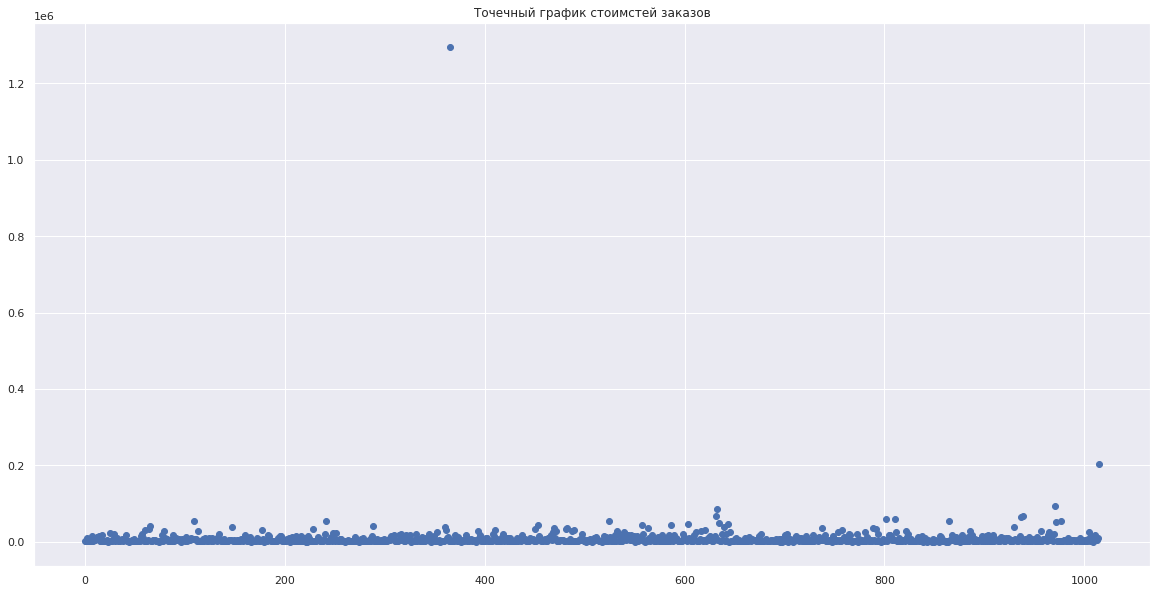

In [22]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимстей заказов')

Есть как минимум два явных выброса, один из которых очень сильно превышает основную массу заказов.

(0.0, 100000.0)

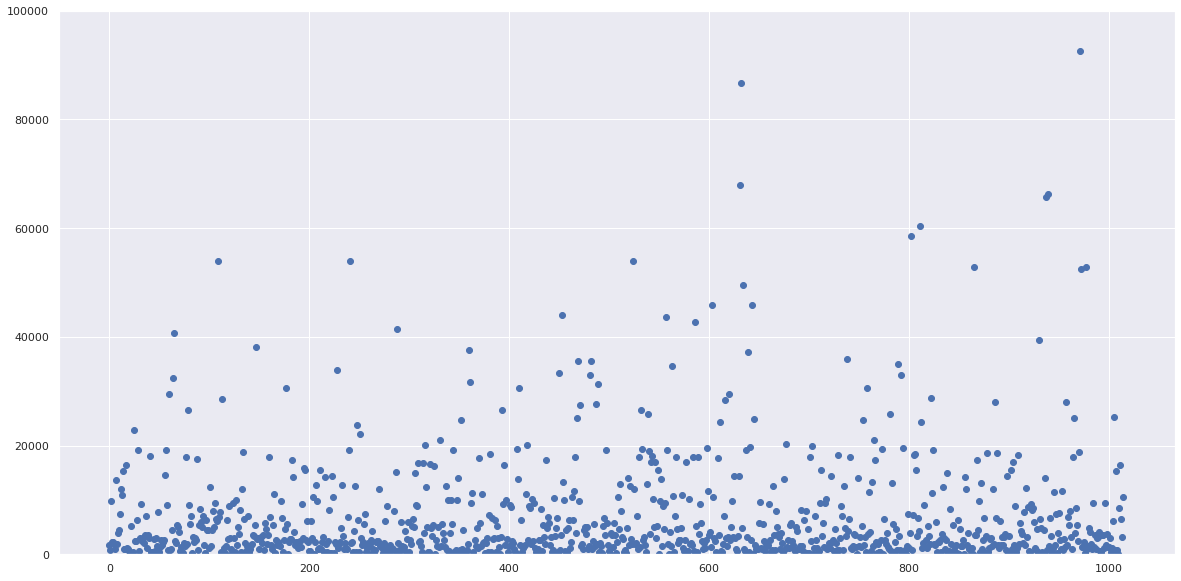

In [23]:
#посмотрим подробнее значения от 0 до 100000
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)

### Посчитем 95-й и 99-й перцентили стоимости заказов

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов на сумму выше 26785, не более 1% заказов на сумму выше 53904. Примем за аномальные те заказы, сумма которых превышает 53904,на графике в районе этого значения в основновном единичные заказы, так мы исключим 1% заказов.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Нулевая гипотеза: статистически значимых отличий в среднем числе заказов между группами нет

Альтернативная гипотеза: есть статистически значимые отличия в среднем числе заказов между группами

Уровень статистической значимости: 0.05

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B по отношению к группе A:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительный прирост конверсии группы B по отношению к группе A: 0.160


p-value: 0.011, меньше статистической значимости, значит нулевую гипотезу отвергаем. Различия в среднем количестве заказов между группами есть.
Относительны прирост группы В составляет 16%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: статистически значимых отличий в среднем чеке заказа между группами нет

Альтернативная гипотеза: есть статистически значимые отличия в среднем чеке заказа между группами

Уровень статистической значимости: 0.05

In [26]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост конверсии группы B по отношению к группе A:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Относительный прирост конверсии группы B по отношению к группе A: 0.287


p-value: 0.829, больше статистической значимости, значит нулевую гипотезу не отвергаем. Различий в среднем чеке заказа между группами нет. Относительны прирост группы В составляет 28,7%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сначала уберём из данных выбросы и аномалии.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orders_agg['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orders_agg['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Нулевая гипотеза: статистически значимых отличий в среднем числе заказов между группами нет

Альтернативная гипотеза: есть статистически значимые отличия в среднем числе заказов между группами

Уровень статистической значимости: 0.05

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B по отношению к группе A:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.008
Относительный прирост конверсии группы B по отношению к группе A: 0.188


p-value: 0.008, меньше статистической значимости, значит нулевую гипотезу отвергаем. Различия в среднем количестве заказов между группами есть. Относительны прирост группы В составляет 18,8%.

Результаты по среднему количеству заказов практически не изменились.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: статистически значимых отличий в среднем чеке заказа между группами нет

Альтернативная гипотеза: есть статистически значимые отличия в среднем чеке заказа между группами

Уровень статистической значимости: 0.05

In [29]:
print(
    'p-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост конверсии группы B по отношению к группе A:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.969
Относительный прирост конверсии группы B по отношению к группе A: 0.002


p-value: 0.969, больше статистической значимости, значит нулевую гипотезу не отвергаем. Различий в среднем чеке заказа между группами нет. Относительны прирост группы В составляет 2%.

p-value после очистки данных увеличился, при этом относительный прирост группы B сократился с 25% до 2%.

## Выводы

Мы приоритизировали гипотезы для увелечения выручки, выдвинутые совместно с отделом маркетинга. Для этого мы использовали фреймворки ICE и RICE, в первом случае самой перспективной оказалась гипотеза запуска акции, которая даёт скидку на товар в день рождения, но во втором случае, с учётом количества охваченных пользователей лидером стала гипотеза по добавлению формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

При проведении А/В-теста были обнаружены такие особенности:

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

- Статистически значимые различия наблюдаются по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. В группе В средний прирост количества заказов после фильтрации составляет 18.8%;

- График различия среднего количества заказов между группами сообщает, что результаты группы B выше группы A;

- График различия среднего чека практически на протяжении всего теста у группы В выше, чем у группы А.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В.